In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('main_data.csv')

In [4]:
data

,Unnamed: 0,country,year,protest,protesterviolence,protest_time,reasons_social,reasons_policebrutality,reasons_other,reasons_land,...,responses_shootings,responses_other,responses_crowd_dispersal,responses_beatings,responses_killings,responses_ignore,violent_response,success,violence_both,violent_protest_time
0,13647,Afghanistan,1990,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13648,Afghanistan,1991,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13649,Afghanistan,1992,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13650,Afghanistan,1993,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13651,Afghanistan,1994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,11116,Zimbabwe,2019,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
17141,11117,Zimbabwe,2019,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
17142,11118,Zimbabwe,2019,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
17143,11119,Zimbabwe,2019,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
data.keys()

Index(['Unnamed: 0', 'country', 'year', 'protest', 'protesterviolence',
       'protest_time', 'reasons_social', 'reasons_policebrutality',
       'reasons_other', 'reasons_land', 'reasons_political', 'reasons_labor',
       'reasons_price', 'reasons_removal', 'responses_accomodation',
       'responses_arrests', 'responses_shootings', 'responses_other',
       'responses_crowd_dispersal', 'responses_beatings', 'responses_killings',
       'responses_ignore', 'violent_response', 'success', 'violence_both',
       'violent_protest_time'],
      dtype='object')

In [6]:
MM = data[['country','reasons_social', 'reasons_policebrutality',
       'reasons_other', 'reasons_land', 'reasons_political', 'reasons_labor',
       'reasons_price', 'reasons_removal', 'responses_accomodation',
       'responses_arrests', 'responses_shootings', 'responses_other',
       'responses_crowd_dispersal', 'responses_beatings', 'responses_killings',
       'responses_ignore']].groupby(['country']).sum().reset_index()

In [7]:
abc = MM.corr()

In [8]:
new = abc[['reasons_social', 'reasons_policebrutality','reasons_land', 'reasons_political', 'reasons_labor',
       'reasons_price', 'reasons_removal']].loc[['responses_accomodation',
       'responses_arrests', 'responses_shootings',
       'responses_crowd_dispersal', 'responses_beatings', 'responses_killings',
       'responses_ignore']]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

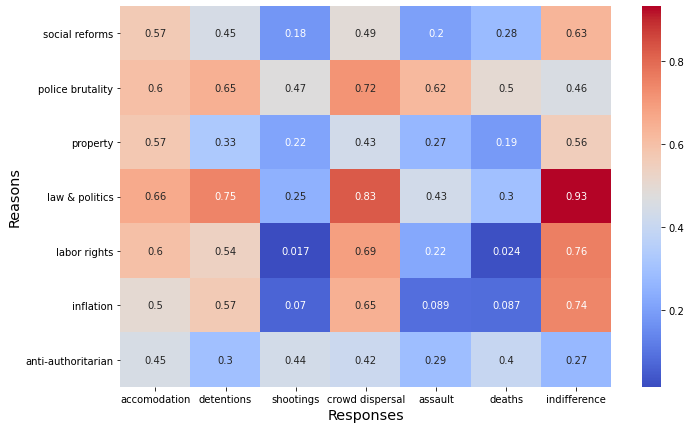

In [9]:
plt.figure(figsize = (11,7))
cmp = sns.color_palette("coolwarm", as_cmap=True)
ax = sns.heatmap(new.T, annot = True, cmap = cmp, cbar=True, xticklabels=['accomodation', 'detentions', 'shootings', 'crowd dispersal', 'assault', 'deaths','indifference'], yticklabels=['social reforms', 'police brutality', 'property', 'law & politics', 'labor rights','inflation', 'anti-authoritarian'])

plt.ylabel('Reasons',fontsize='x-large')
plt.xlabel('Responses',fontsize='x-large')

plt.xticks(fontweight='roman')
plt.yticks(fontweight='roman')


# plt.savefig('corr.jpeg', bbox_inches = 'tight')

### Model Traing

In [10]:
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import collections

In [11]:
categories = list(collections.Counter(data['country']).keys())
catID = dict(zip(list(categories),range(len(categories))))
categories_Enc = list([np.array(categories, dtype='object' ).reshape(-1,)])

In [12]:
def get_feat(datum):
    feat = [1.0, datum['protest_time'],datum['protesterviolence'],datum['reasons_social'], datum['reasons_policebrutality'],datum['reasons_other'], datum['reasons_land'], datum['reasons_political'], datum['reasons_labor'],datum['reasons_price'], datum['reasons_removal'],datum['violent_protest_time']]
    return feat

In [13]:
X_Country = np.array(list(data['country'])).reshape(-1, 1)

Enc = OneHotEncoder(categories = categories_Enc, handle_unknown='ignore')
Enc.fit(X_Country)

OneHotEncoding_Country = Enc.transform(X_Country).toarray()

In [14]:
y = [int(d['responses_accomodation']) for i,d in data.iterrows()]
X = [get_feat(d) for i,d in data.iterrows()]

for i,si in enumerate(OneHotEncoding_Country):
    X[i].extend(list(si))

In [15]:
# split data into train and test sets
seed = 7
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [16]:
mod = linear_model.LogisticRegression(C=100.0, class_weight='balanced')
mod.fit(X, y)

# mod = XGBClassifier(class_weight='balanced')
# mod.fit(np.array(X_train), y_train)

/home/stark/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100.0, class_weight='balanced')

In [17]:
def Eval_Results(y_cap, y):
    # True positives, false positives, etc.
    TP_ = np.logical_and(y_cap, y)
    FP_ = np.logical_and(y_cap, np.logical_not(y))
    TN_ = np.logical_and(np.logical_not(y_cap), np.logical_not(y))
    FN_ = np.logical_and(np.logical_not(y_cap), y)
    Total = sum(TP_) + sum(FP_) + sum(TN_) + sum(FN_)


    TP = sum(TP_)/Total
    FP = sum(FP_)/Total
    TN =sum(TN_)/Total
    FN = sum(FN_)/Total

    # Evaluate Accuracy
    Acc = (TP + TN) / (TP + FP + TN + FN)
    # Evaluate BER
    BER = 1 - 0.5 * (TP / float(TP + FN) + TN / float(TN + FP))
    
    return Acc, BER, (TP, FP, TN, FN)

In [18]:
# make predictions for test data
y_pred = list(mod.predict(np.array(X_test)))
Acc, BER, conf = Eval_Results(y_pred, y_test)

In [19]:
print("Test Accuracy:",Acc)
print("Test BER:",BER)
print("Test(TP, FP, TN, FN):",conf)

Test Accuracy: 0.6839650145772594
Test BER: 0.3349590937696665
Test(TP, FP, TN, FN): (0.04723032069970846, 0.2897959183673469, 0.636734693877551, 0.026239067055393587)


## ColudWord

In [20]:
from wordcloud import WordCloud 

In [21]:
reasons_dict = dict()
a = ['reasons_social', 'reasons_policebrutality', 'reasons_land', 'reasons_political', 'reasons_labor','reasons_price', 'reasons_removal']
b = ['social reforms', 'police brutality', 'property', 'political agenda', 'labor rights','inflation', 'anti-authoritarian']

for r2,r1 in zip(a,b):
    reasons_dict[r1] = sum(data[r2])

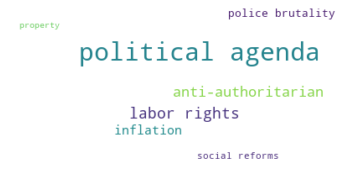

In [22]:
wordcloud1 = WordCloud(min_word_length =3,
                      background_color='white')
wordcloud1.generate_from_frequencies(reasons_dict)

#plot
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
responses_dict = dict()

a = ['responses_arrests', 'responses_shootings', 'responses_crowd_dispersal', 'responses_beatings', 'responses_killings','responses_ignore', 'success']
b = ['detentions', 'shootings', 'crowd dispersal', 'assault', 'deaths','indifference', 'accommodation']

for r2,r1 in zip(a,b):
    responses_dict[r1] = sum(data[r2])



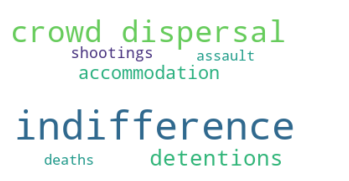

In [24]:
wordcloud2 = WordCloud(min_word_length =3,
                      background_color='white')
wordcloud2.generate_from_frequencies(responses_dict)

#plot
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
og_data = pd.read_csv('mmALL_073120_csv.csv')
txt = [d['notes'] for i,d in og_data.iterrows() if isinstance(d['notes'],str)]

In [26]:
tmp = ''.join(txt)

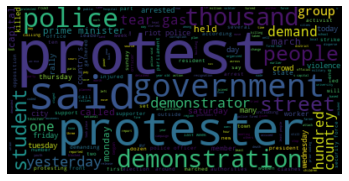

In [27]:
#create the wordcloud object
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(tmp)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

### Year-wise Data Analysis

In [28]:
yearly = data[['year','responses_arrests', 'responses_shootings', 'responses_beatings', 'responses_killings']].copy()
yearly = yearly.groupby(['year']).sum()
yearly = yearly[:-1]

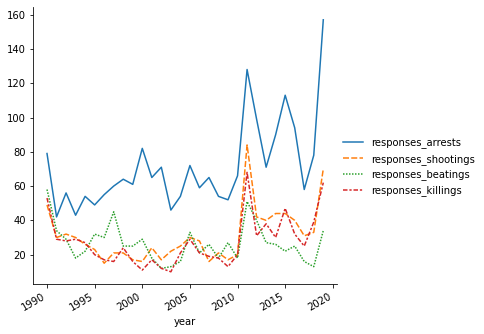

In [29]:
sns.set_palette('tab10')
g = sns.relplot(kind="line", data=yearly)
g.fig.autofmt_xdate()

## Slide-8

findfont: Font family ['Gill Sans MT'] not found. Falling back to DejaVu Sans.


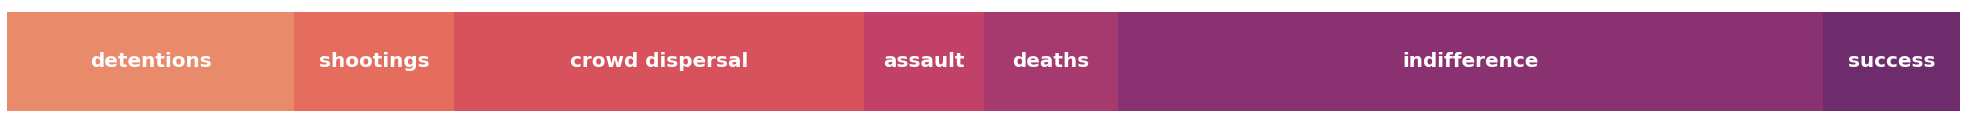

In [30]:
category_names2 = ['detentions', 'shootings', 'crowd dispersal', 'assault', 'deaths', 'indifference', 'success']
results2 = {'': [2149, 1200, 3072, 900, 1000, 5285, 1027]}


def survey2(results, category_names):
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('flare')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(35, 2))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, 
category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, category_names[i], ha='center', va='center',
                    color=text_color, fontsize=20, fontweight='bold', fontname='Gill Sans MT')
    ax.axis('off')
    return fig, ax

survey2(results2, category_names2)
plt.savefig('responses.jpeg', bbox_inches = 'tight')
plt.show()

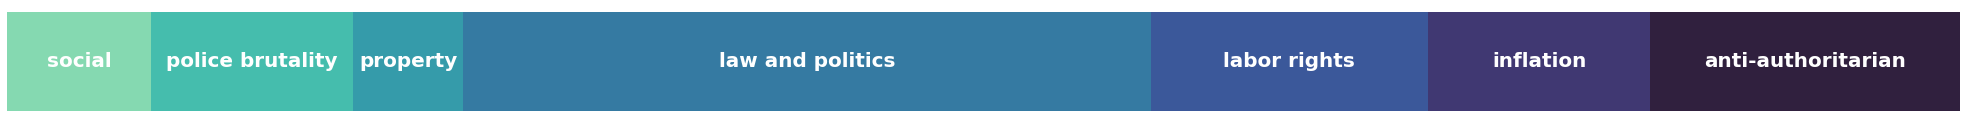

In [31]:
category_names2 = ['social', 'police brutality', 'property', 'law and politics', 'labor rights', 'inflation', 'anti-authoritarian']
results2 = {'': [784, 1101, 602, 3750, 1511, 1214, 1689]}

def survey2(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('mako_r')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(35, 2))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, 
category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, category_names[i], ha='center', va='center',
                    color=text_color, fontsize=20, fontweight='bold', fontname='Gill Sans MT')

    ax.axis('off')
    return fig, ax


survey2(results2, category_names2)
plt.savefig('reasons.jpeg', bbox_inches = 'tight')
plt.show()

## old slide-10

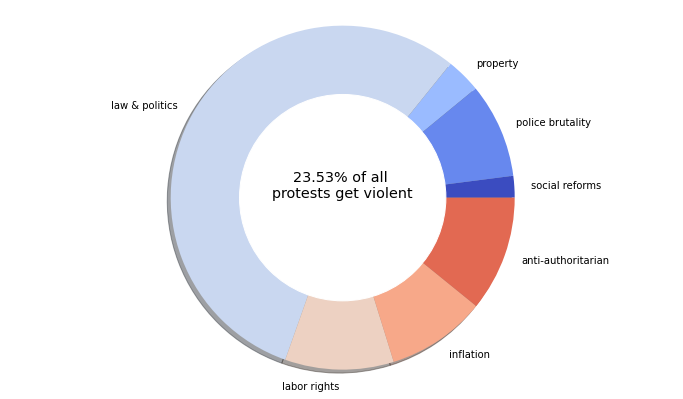

<Figure size 432x288 with 0 Axes>

In [32]:
list_reasons = ['reasons_social', 'reasons_policebrutality','reasons_land', 'reasons_political', 'reasons_labor','reasons_price', 'reasons_removal']
v_Idx = data['protesterviolence']>0

v_dist = []
for reason in list_reasons:
    Idx = data[reason]>0
    v_dist.append(sum(Idx&v_Idx))   

sizes = v_dist
labels = ['social reforms', 'police brutality', 'property', 'law & politics', 'labor rights','inflation', 'anti-authoritarian']
col = plt.get_cmap('coolwarm')(
        np.linspace(0, 1, len(labels)+1))
tmp = np.append(col[:len(labels)//2], col[len(labels)//2:], 0)

plt.figure(figsize=(12,7))

plt.pie(sizes, labels=labels, shadow=True, colors=tmp)
plt.axis('equal')
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.text(0, 0, '{0:.2f}% of all \nprotests get violent'.format(sum(v_Idx)/len(v_Idx)*100), ha='center', fontsize='x-large')
plt.show()
plt.savefig('reasons_donut.jpeg', bbox_inches = 'tight')

## Slide-12

In [33]:
from collections import Counter

In [34]:
tmp = dict()
tmp1 = []
tmp2 = []
for x in range(1,8):
    Idx = data['protest_time']==x
    v_Idx = data['violence_both']>0
    
    if(sum(Idx)==0):
        tmp[x]=0
    else:
        tmp[(x,x+10)]=sum(v_Idx & Idx)/sum(v_Idx)*100
        tmp1.append(sum(v_Idx & Idx)/sum(v_Idx)*100)
        tmp2.append(x)
        

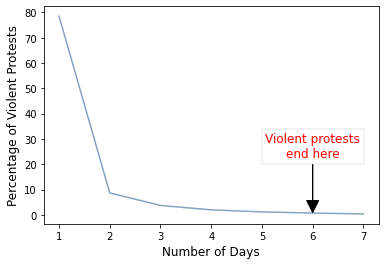

In [35]:
plt.plot(tmp2, tmp1, color = (0.2, 0.4, 0.6, 0.6))
plt.ylabel('Percentage of Violent Protests',fontsize='large')
plt.xlabel('Number of Days',fontsize='large')
plt.annotate('Violent protests\nend here', xy=(6, 0.7075471698113208), xytext=(6, 22.7075471698113208),
             bbox=dict(boxstyle='square', fc='white', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=12, color='red', horizontalalignment='center')

plt.savefig('itEnds.jpeg', bbox_inches = 'tight')

## Slide-14,15,16

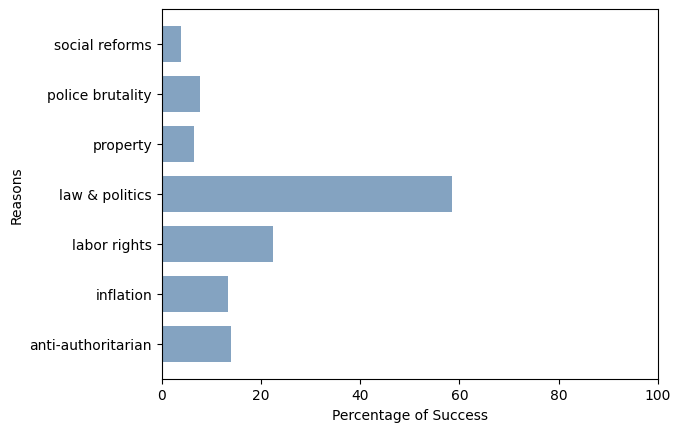

In [36]:
list_reasons = ['reasons_social', 'reasons_policebrutality','reasons_land', 'reasons_political', 'reasons_labor','reasons_price', 'reasons_removal']
s_Idx = data['success']>0
labels = ['social reforms', 'police brutality', 'property', 'law & politics', 'labor rights','inflation', 'anti-authoritarian']
s_dist = []
for reason in list_reasons:
    Idx = data[reason]>0
    s_dist.append(sum(Idx&s_Idx)/sum(s_Idx)*100)   


plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(labels))
y_pos = np.linspace(0, 2.5, len(labels))

ax.barh(y_pos, s_dist, align='center', height=0.3, color=(0.2, 0.4, 0.6, 0.6))
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage of Success')
ax.set_ylabel('Reasons')
plt.xlim([0, 100])

plt.savefig('REsuc.jpeg', bbox_inches = 'tight')
plt.show()

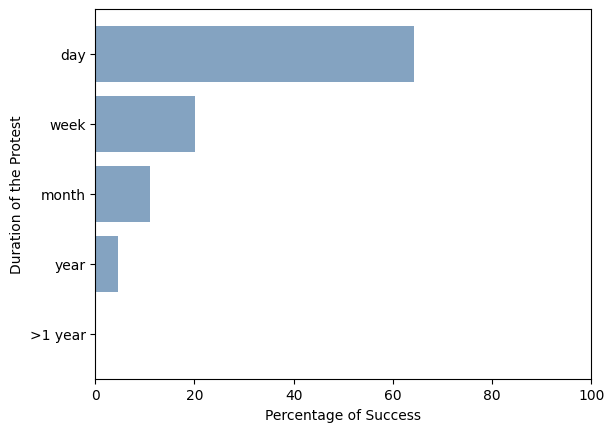

In [37]:
list_d = [(0,1),(1,7),(7,30),(30,365),(365,7000)]
s_Idx = data['success']>0
labels = ['day','week','month','year','>1 year']
s_dist = []
for a,b in list_d:
    Idx1 = data['protest_time']>a
    Idx2 = data['protest_time']<=b
    s_dist.append(sum(Idx1&Idx2&s_Idx)/sum(s_Idx)*100)   


plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(labels))
y_pos = np.linspace(0, 1.5, len(labels))

ax.barh(y_pos, s_dist, align='center', height=0.3, color=(0.2, 0.4, 0.6, 0.6))
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage of Success')
ax.set_ylabel('Duration of the Protest')
plt.xlim([0, 100])

plt.savefig('Dusuc.jpeg', bbox_inches = 'tight')
plt.show()

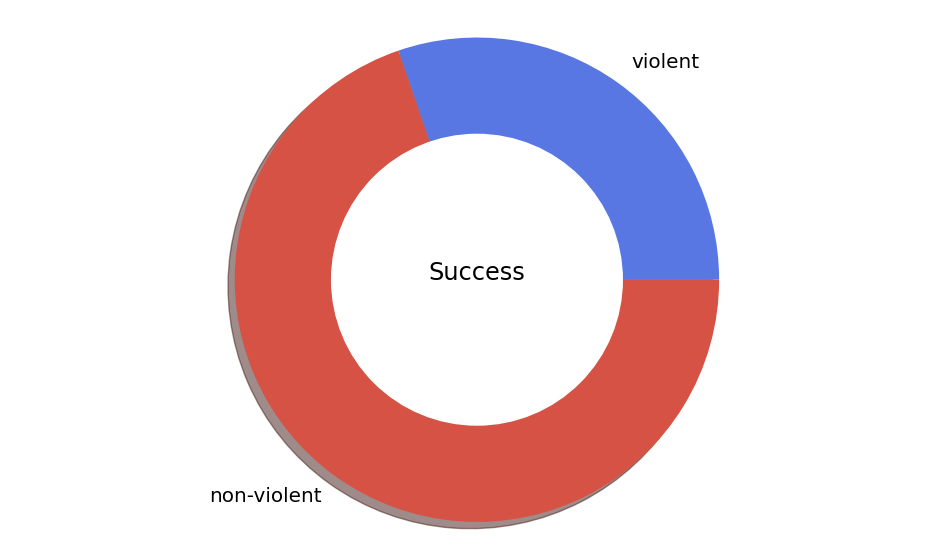

<Figure size 640x480 with 0 Axes>

In [38]:
 

Idx = data['success']>0
v_Idx = data['violence_both']>0

sizes = [sum(v_Idx & Idx)/sum(Idx)*100, 100-sum(v_Idx & Idx)/sum(Idx)*100]

labels = ['violent', 'non-violent']
tmp = plt.get_cmap('coolwarm')(
        np.linspace(0.1, 0.9, len(labels)))

plt.figure(figsize=(12,7))

plt.pie(sizes, labels=labels, shadow=True, colors=tmp, textprops={'fontsize': 'x-large'})
plt.axis('equal')
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.text(0, 0, 'Success', ha='center', fontsize='xx-large')
plt.show()

plt.savefig('suc_donut.jpeg', bbox_inches = 'tight')

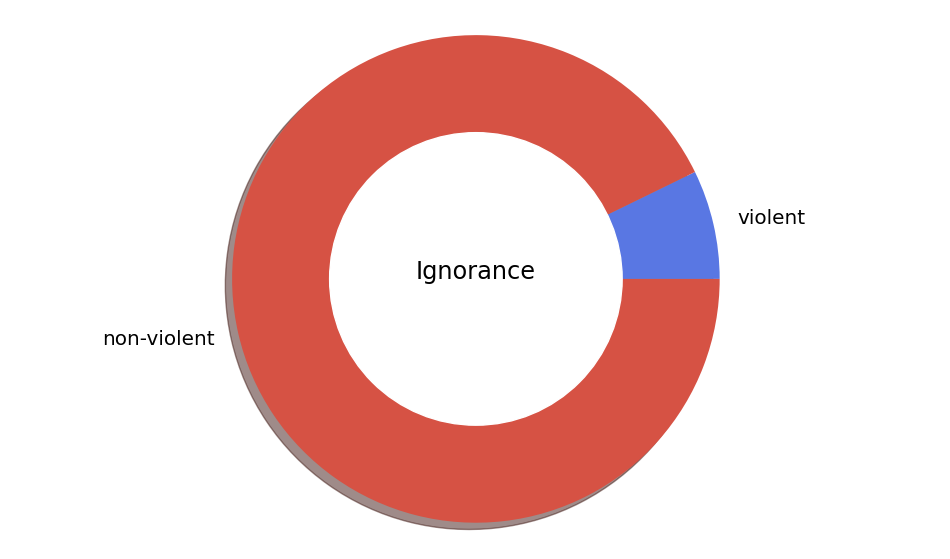

<Figure size 640x480 with 0 Axes>

In [39]:
 

Idx = data['responses_ignore']>0
v_Idx = data['violence_both']>0

sizes = [sum(v_Idx & Idx)/sum(Idx)*100, 100-sum(v_Idx & Idx)/sum(Idx)*100]

labels = ['violent', 'non-violent']
tmp = plt.get_cmap('coolwarm')(
        np.linspace(0.1, 0.9, len(labels)))

plt.figure(figsize=(12,7))

plt.pie(sizes, labels=labels, shadow=True, colors=tmp, textprops={'fontsize': 'x-large'})
plt.axis('equal')
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.text(0, 0, 'Ignorance', ha='center', fontsize='xx-large')
plt.show()

plt.savefig('ig_donut.jpeg', bbox_inches = 'tight')

## Slide-18

In [47]:
import pygal
from pygal.maps.world import COUNTRIES

In [48]:
data['country'] = data['country'].replace(['United Arab Emirate'], 'United Arab Emirates')
data['country'] = data['country'].replace(['USSR'], 'Russia')
data['country'] = data['country'].replace(['Germany West','Germany East'], 'Germany')
data['country'] = data['country'].replace(['Yugoslavia'], 'Croatia')
data['country'] = data['country'].replace(['Czechoslovakia'], 'Slovakia')
data['country'] = data['country'].replace(['Bosnia'], 'Bosnia and Herzegovina')
data['country'] = data['country'].replace(['Serbia and Montenegro', 'Kosovo'], 'Serbia')
data['country'] = data['country'].replace(['Congo Kinshasa', 'Congo Brazzaville'], 'Congo')
data['country'] = data['country'].replace(['South Sudan', 'North Sudan'], 'Sudan')

In [49]:
tmp = data[['country','protest']].groupby('country').sum().sort_values('protest')

In [50]:
rev_map  = {v:k for k,v in COUNTRIES.items()}

In [51]:
mx_c = []
for x in tmp[-25:].iterrows():
    try:
        mx_c.append(rev_map[x[0]])
    except:
        pass
mx_c.append('us')

In [52]:
mn_c = []
for x in tmp[:25].iterrows():
    try:
        mn_c.append(rev_map[x[0]])
    except:
        pass

In [53]:
worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = 'Outliers of the World'
worldmap_chart.add('Most Protests', mx_c)
worldmap_chart.add('Least Protests', mn_c)
worldmap_chart.render_in_browser()

file:///tmp/tmpz1163t7o.html
